In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [44]:
def testBayers(x, pw1, pw2):
    e1, e2 = -2, 2
    a1, a2 = 0.5, 2
    risk = np.array([[0,4],[4,0]])
    pw1x = scipy.stats.norm.pdf(x,e1,a1)/(scipy.stats.norm.pdf(x,e1,a1)+scipy.stats.norm.pdf(x,e2,a2))
    pw2x = scipy.stats.norm.pdf(x,e2,a2)/(scipy.stats.norm.pdf(x,e1,a1)+scipy.stats.norm.pdf(x,e2,a2))
    pwx = np.concatenate([pw1x,pw2x],axis=1)
    R = pwx @ risk
    R1, R2 = np.split(R, 2, axis=1)
    result = R1 >= R2

    t = np.linspace(-5,5,100).reshape(100,1)
    pw1t = scipy.stats.norm.pdf(t,e1,a1)/(scipy.stats.norm.pdf(t,e1,a1)+scipy.stats.norm.pdf(t,e2,a2))
    pw2t = scipy.stats.norm.pdf(t,e2,a2)/(scipy.stats.norm.pdf(t,e1,a1)+scipy.stats.norm.pdf(t,e2,a2))
    pwt = np.concatenate([pw1t,pw2t],axis=1)
    R = pwt @ risk
    location, best = x[np.logical_not(result)], x[result]
    plt.plot(t, R[:,0], 'b-', label='normal')
    plt.plot(t, R[:,1], 'g-', label='abnormal')
    plt.plot(location,-0.1*np.ones_like(location),'b^', label='location')
    plt.plot(x[result],-0.1*np.ones_like(best),'g^', label='best')

ValueError: x and y must have same first dimension, but have shapes (13,) and (1,)

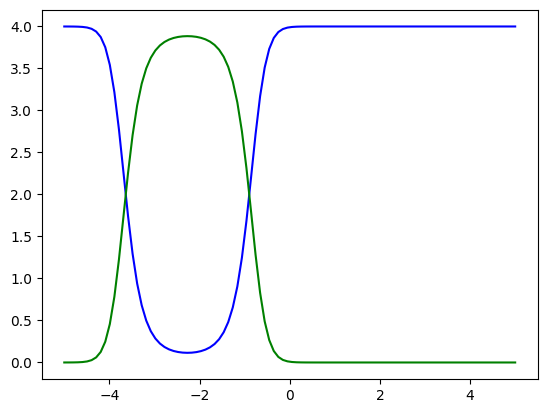

In [45]:
X=np.array([-3.9847,-3.5549,-1.2401,-0.9780,-0.7932,-2.8531,-2.7605,-3.7287,-2.5414,-2.2692,-3.4549,-3.0752,-3.9934,2.8792,-0.9780,0.7932,1.1882,3.0682,-1.5799,-1.4885,-0.7431,-0.4221,-1.1186,4.2532]).reshape([24,1])
pw1, pw2 = 0.9, 0.1
testBayers(X, pw1, pw2)